In [3]:
from PoisDenoiser.nnLayers.gradChecker import poisNet_gradCheck
# from PoisDenoiser.nnLayers.functional import poisProx, alphaFunc, \
#                                                 projFunc,\
#                                                 condFunc

from PoisDenoiser.networks.PoisNet.net import PoisNet

import torch as th
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:

d_x = {}
# d_alpha = {}
num = 5
k_arr = np.logspace(-3, 1, num=5)
for k in k_arr:
    d_x[k] = []
#     d_alpha[k] = []

for k in k_arr:
    print('k == {:.3f}'.format(k))
    for i in tqdm(range(num)):
        res = poisNet_gradCheck(noise_param=k)
        d_x[k].append(float(res[0]))
#         d_alpha[k].append(float(res[3]))



  0%|          | 0/5 [00:00<?, ?it/s]

k == 10.000




 20%|██        | 1/5 [00:37<02:30, 37.75s/it]

 40%|████      | 2/5 [01:15<01:53, 37.86s/it]

 60%|██████    | 3/5 [01:56<01:17, 38.56s/it]

 80%|████████  | 4/5 [02:34<00:38, 38.56s/it]

100%|██████████| 5/5 [03:15<00:00, 39.25s/it]



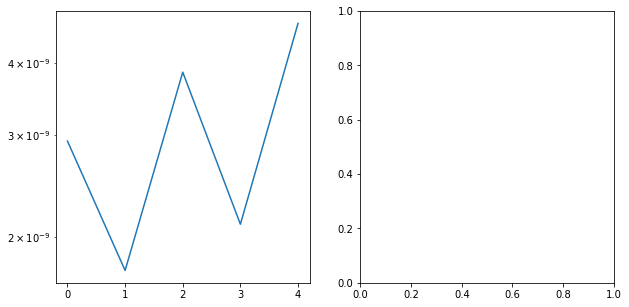

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
for k in k_arr:
    ax[0].semilogy(d_x[k], label='k={:.3f}'.format(k))
#     ax[1].semilogy(d_alpha[k], label='k={:.3f}'.format(k))
    
#     plt.legend()

In [80]:
for k in k_arr:
    print('{:.5e} {:.5e} | {:.5e} {:.5e}'\
          .format(min(d_x[k]), max(d_x[k]), min(d_alpha[k]), max(d_alpha[k])))

5.18934e-10 1.57071e-09 | 3.12773e-11 2.58951e-10
2.17119e-10 8.77341e-10 | 3.54163e-11 4.23996e-10
4.20337e-11 4.76544e-10 | 7.61598e-11 7.04131e-10
1.07833e-10 4.49205e-10 | 2.70491e-10 2.64554e-08
1.16686e-10 5.13618e-08 | 2.99038e-10 1.90374e-07


In [90]:
th.manual_seed(1234)

x = th.rand((4, 1, 2,2)).double()
z = th.rand((4, 1, 2,2)).double()
z = th.distributions.Poisson(z/0.1).sample()
x[:2] = z[:2].clone() 

alpha = th.rand((x.size(0), 1,1,1)).double()
alpha[:2] = 0

x.requires_grad = True

proj = projFunc(x,z, alpha)
proj.backward(th.ones_like(proj).type_as(x))

x.grad

tensor([[[[1.0000, 1.0000],
          [1.0000, 1.0000]]],


        [[[1.0000, 1.0000],
          [1.0000, 1.0000]]],


        [[[0.4938, 0.4614],
          [0.5027, 0.4803]]],


        [[[0.6302, 0.7902],
          [0.5184, 0.6204]]]], dtype=torch.float64)